In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

### Load the data

In [2]:
iris = load_iris()

In [3]:
X = iris.data
X.shape

(150, 4)

In [4]:
list(zip(np.mean(X, axis=0), np.std(X, axis=0))) # mean and standard deviations of the data

[(5.843333333333335, 0.8253012917851409),
 (3.057333333333334, 0.43441096773549437),
 (3.7580000000000027, 1.7594040657753032),
 (1.199333333333334, 0.7596926279021594)]

### Standardize the data

In [5]:
X_scaled = scale(X) # subtract mean (center) and divide by standard deviation (normalize) the data

In [6]:
list(zip(np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0))) 
# mean and standard deviations of the standardized data
# mean around zero and standard deviation about 1 as is expected

[(-1.6903145549918008e-15, 0.9999999999999998),
 (-1.84297022087776e-15, 0.9999999999999993),
 (-1.6986412276764896e-15, 1.0000000000000002),
 (-1.4092430925908654e-15, 1.0)]

### Computing PCA

In [7]:
covariance_matrix = X_scaled.T.dot(X_scaled) * (1 / (X_scaled.shape[0] - 1)) # XT*X*(1/(N-1))

In [8]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
np.cov(X_scaled.T) # to check the correctness of the covariance matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [11]:
explained_variance_ratio = []
for i in eigen_values:
    explained_variance_ratio.append((i / sum(eigen_values)) * 100)
print(explained_variance_ratio) 
# as is expected the first component explains the biggest part of variance compared to other components

[72.96244541329983, 22.850761786701796, 3.6689218892828737, 0.5178709107154882]


In [12]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance_ratio)

[ 72.96244541  95.8132072   99.48212909 100.        ]


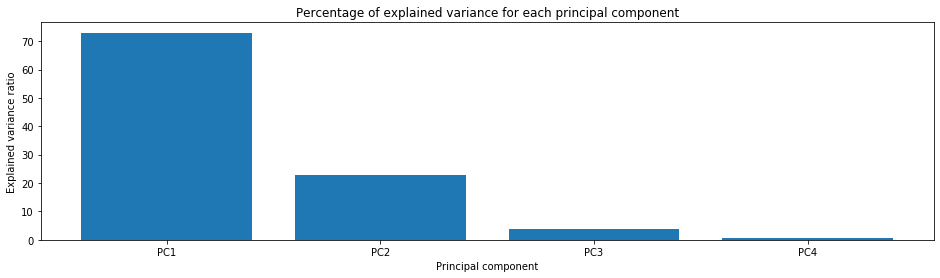

In [13]:
plt.figure(figsize=(16, 4))
plt.bar(x=range(1, len(explained_variance_ratio) + 1), height=explained_variance_ratio,
        tick_label=['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Percentage of explained variance for each principal component')
plt.show()

In [14]:
eigen_vectors[:, 0] # the first PCA component

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [15]:
eigen_vectors[:, 1] # the second component

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

In [16]:
eigen_vectors[:, 1] * -1 # multiply by "-1" to make it look exactly like in sklearn. It will be shown in the next section

array([0.37741762, 0.92329566, 0.02449161, 0.06694199])

In [17]:
projection_matrix = np.array([eigen_vectors[:,0], eigen_vectors[:,1]*-1])

In [18]:
projection_matrix

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

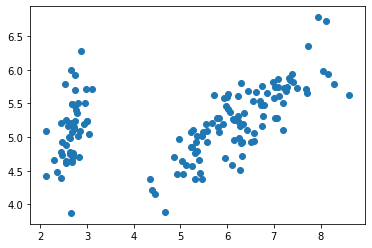

In [19]:
plt.scatter(X.dot(projection_matrix.T)[:, 0], X.dot(projection_matrix.T)[:, 1])

#### Multicollinearity issue in econometrics can be detected via PCA by computing the condition number

In [20]:
condition_number = math.sqrt(abs(max(eigen_values)) / abs(min(eigen_values)))

In [21]:
condition_number # there is some minor multicollinearity between variables

11.869677852761486

In [22]:
np.corrcoef(X_scaled.T) # this problem can also be noticed by looking at the correlations of independent variables
# some of them are more than 0.85

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### Use sklearn.decomposition.PCA to check the correctness of pca components

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.components_[0] # the first component is exactly the same as computed earlier

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [27]:
pd.Series(pca.components_[0], index=iris.feature_names).abs().sort_values(ascending=False) 
# the first component parts and its features weights

petal length (cm)    0.580413
petal width (cm)     0.564857
sepal length (cm)    0.521066
sepal width (cm)     0.269347
dtype: float64

In [28]:
pca.components_[1] # only the sign is different

array([0.37741762, 0.92329566, 0.02449161, 0.06694199])

In [29]:
pd.Series(pca.components_[1], index=iris.feature_names).abs().sort_values(ascending=False) 
# the second component parts and its features weights

sepal width (cm)     0.923296
sepal length (cm)    0.377418
petal width (cm)     0.066942
petal length (cm)    0.024492
dtype: float64

In [30]:
pca.components_[0][0]

0.5210659146701195

In [31]:
pca.explained_variance_ratio_ * 100 # the explained variance

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

### Plotting the results

In [32]:
X_trans = pca.transform(X)

In [33]:
X_trans[0, 0]

2.6402697573174954

In [34]:
# to check the weights
X[0, 0] * pca.components_[0][0] + X[0, 1] * pca.components_[0][1] +\
X[0, 2] * pca.components_[0][2] + X[0, 3] * pca.components_[0][3]

2.640269757317493

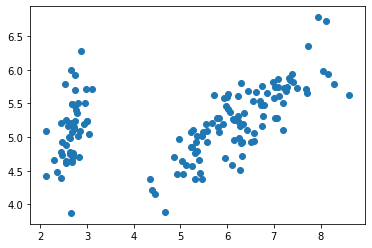

In [35]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])

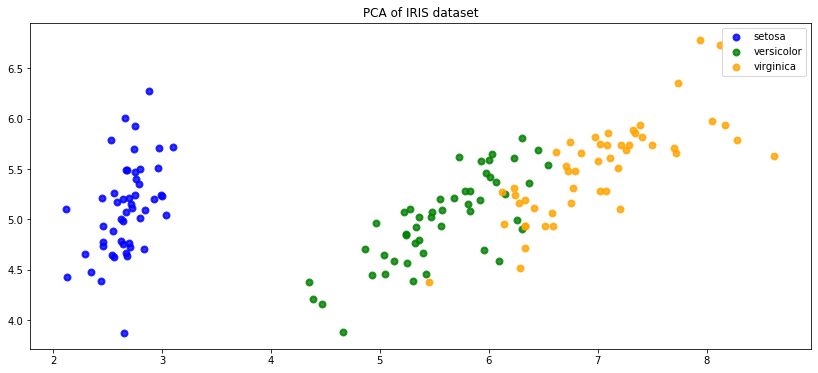

In [36]:
y = iris.target
target_names = iris.target_names
colors = ['blue', 'green', 'orange']
lw = 2

plt.figure(figsize=(14, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

### References
1. [PCA with NumPy](https://towardsdatascience.com/pca-with-numpy-58917c1d0391)
2. [Multicollinearity and condition number](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6900425/#:~:text=The%20condition%20number%20is%20the,cannot%20indicate%20multicollinear%20explanatory%20variables.)
3. [Eigenvectors' signs of PCA](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers)
4. [Beautiful graph for PCA for iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)
5. [StatQuest: PCA in Python](https://www.youtube.com/watch?v=Lsue2gEM9D0)